# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Gabriel Moura </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [68]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [69]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [70]:
lista_latitude = []
for i in range(0, len(df)):
    lista_latitude.append(df["Latitude"][i])


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [82]:
listans = []

for i in range(0, len(lista_latitude)):   
    if lista_latitude[i] >= 0:
        listans.append("Norte")
    else:
        listans.append("Sul")

hemi = pd.Series(listans) 
df["Hemisfério"] = hemi



## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

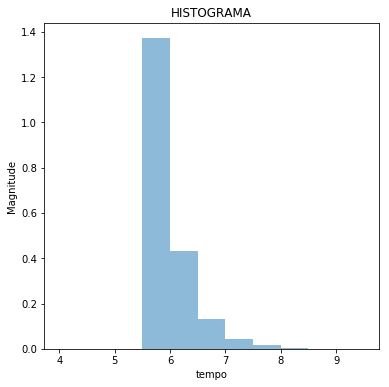

In [122]:
lista_magnitude = []
for i in range(0, len(df)):
    lista_magnitude.append(df["Magnitude"][i])

faixa = np.arange(4,10,0.5)
plot = df['Magnitude'].plot.hist(bins=faixa,title='HISTOGRAMA', normed=1, figsize=(6, 6), alpha=0.5)
plt.ylabel('Magnitude')
plt.xlabel('tempo')

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [119]:
from scipy.stats import expon
x = expon.fit(df.Magnitude)
cc = x[0]
mu = x[1]
print(x)
# loc / Scale

(5.4999999996710809, 0.38254864885090978)


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

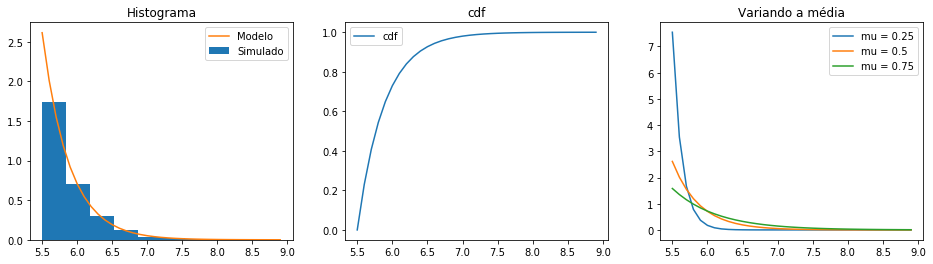

In [121]:
#fazer a relação entre loc e scale com mu e sigma
loc = cc
scale = mu
n = 10000
#Gerar n dados:
X = expon.rvs(loc,scale,n)

#Plots
fig, ax = plt.subplots(1, 3, figsize = (16,4))

#Histograma vs pdf
ax[0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax[0].plot(x, expon.pdf(x, loc, scale))
ax[0].set_title('Histograma')
ax[0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[1].plot(x, expon.cdf(x, loc, scale))
ax[1].set_title('cdf')
ax[1].legend(['cdf'])

#Variando mu
ax[2].plot(x, expon.pdf(x, loc, scale-0.25))
ax[2].plot(x, expon.pdf(x, loc, scale))
ax[2].plot(x, expon.pdf(x, loc, scale+0.25))
ax[2].set_title('Variando a média')
ax[2].legend(['mu = 0.25','mu = 0.5','mu = 0.75'])

plt.show()

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [96]:
ct = pd.crosstab(df.Hemisfério, df.Type, normalize=True)
ct

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447164,0.000085,0.006279,0.000000
Sul,0.545148,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [134]:
probs = df["Hemisfério"].value_counts(True)*100
ProbNorte = probs[1]
print(ProbNorte)


45.3528105245


Explique o seu raciocínio

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [137]:
#P(Nuclear|Norte)
ProbTerremoto= ct.sum()[0]
ProbNuclear = ct.sum()[2]
InterNorteNuc = 0.006279

pNN = InterNorteNuc/ProbNorte


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [139]:
print(pNN)

0.000138447869655


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

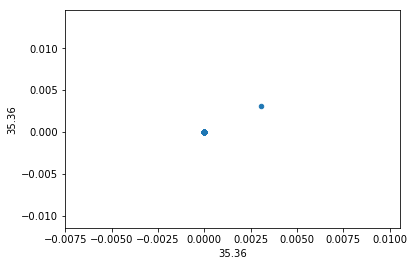

In [143]:
ctt = pd.crosstab(df["Magnitude Error"], df["Depth"], normalize=True)
ctt.plot.scatter(100,100)


Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

Explique o que significa o valor da correlação calculada acima? 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

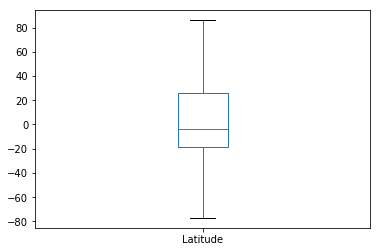

In [156]:
df.Latitude.describe
df['Latitude'].plot(kind='box')

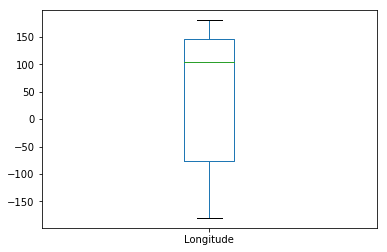

In [157]:
df.Longitude.describe
df['Longitude'].plot(kind='box')

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


NORTE!!! Já que a probabilidade de ter ocorrido lá é maior!